# Heart Failure Prediction Assignment

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# <font color='red'>*Data Exploration (EDA)*</font>

- <font color= 'green'> **Task 1**: Load the dataset using pandas and display the first few rows </font>

In [5]:
df=pd.read_csv("heart failure.csv")
df.head(5)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

- <font color= 'green'>**Task 2**: Check for missing values and duplicated values, after that clean the data if necessary</font>

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

- <font color= 'green'>**Task 3**: Generate summary statistics for the numerical columns</font>

In [10]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

- <font color= 'green'>**Task 4**: Visualize the distribution of the target variable (`DEATH_EVENT`) and Others</font>

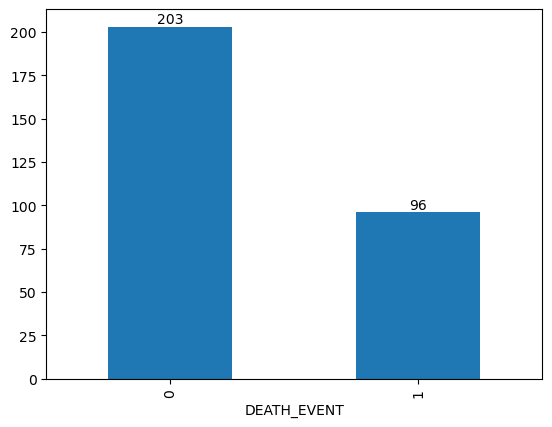

In [12]:
df['DEATH_EVENT'].value_counts().plot(kind='bar')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,
             p.get_height()+2,
             int(p.get_height()),
             ha='center')
plt.show()

<Axes: ylabel='count'>

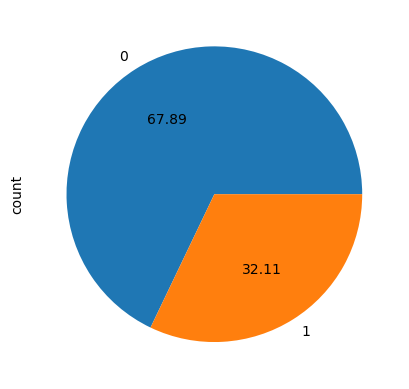

In [13]:
df['DEATH_EVENT'].value_counts().plot(kind='pie',autopct='%.2f')

# <font color='red'> *Bar Plot for Each Classified Column* </font>

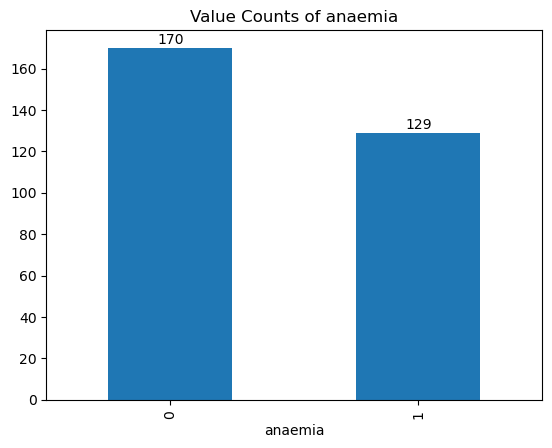

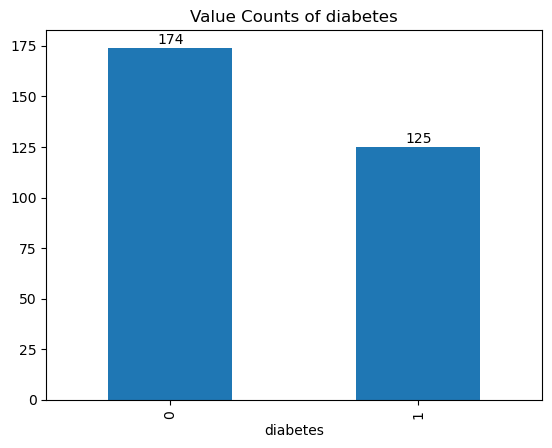

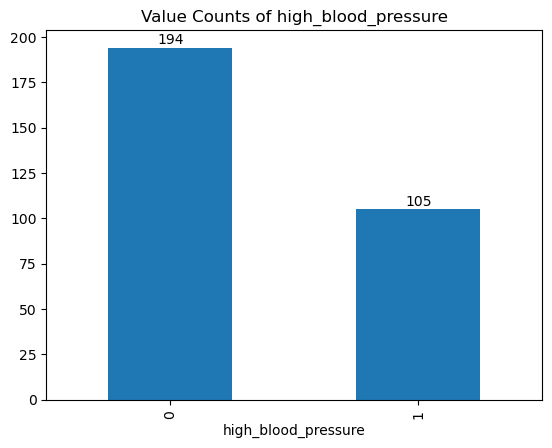

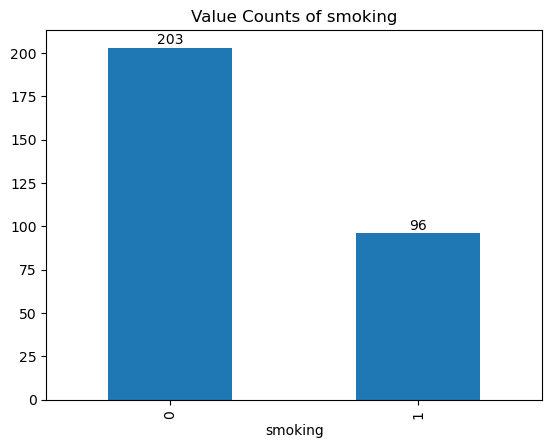

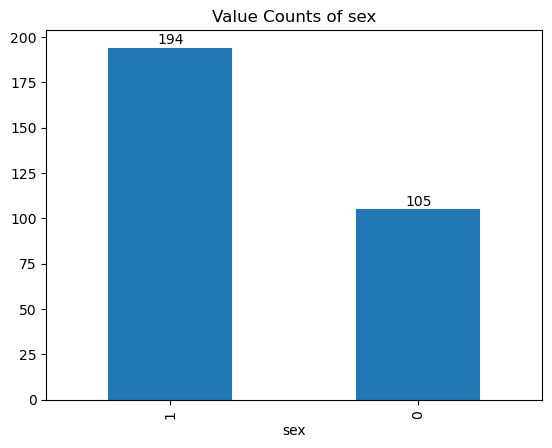

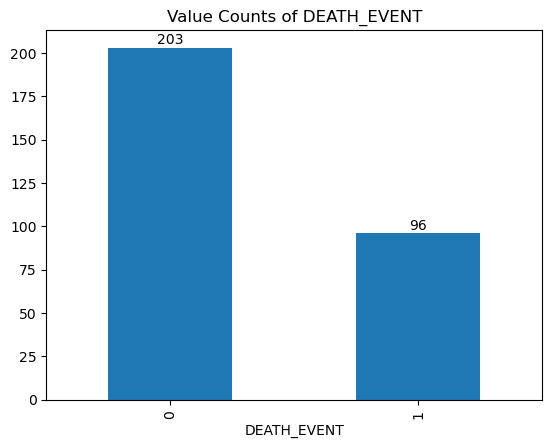

In [15]:
classification_columns=['anaemia', 'diabetes', 'high_blood_pressure','smoking','sex','DEATH_EVENT']
for col in classification_columns:
    df[col].value_counts().plot(kind='bar')
    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2,
        p.get_height()+2,
        int(p.get_height()),
             ha='center')
    plt.title(f'Value Counts of {col}')
    plt.show()

#  **Task 5**: Plot histograms for continuous variables like `age`, `creatinine_phosphokinase`, `ejection_fraction`, `serum_creatinine`, etc.

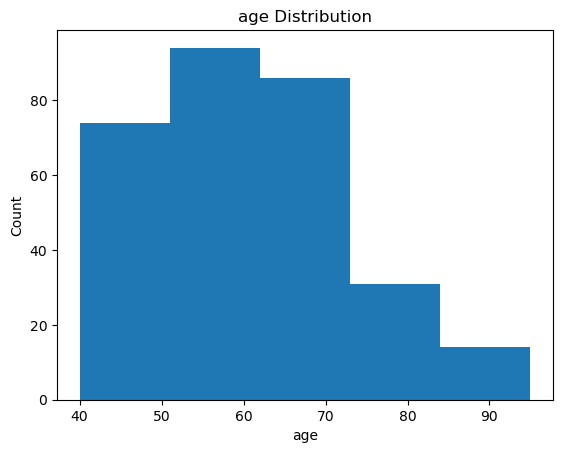

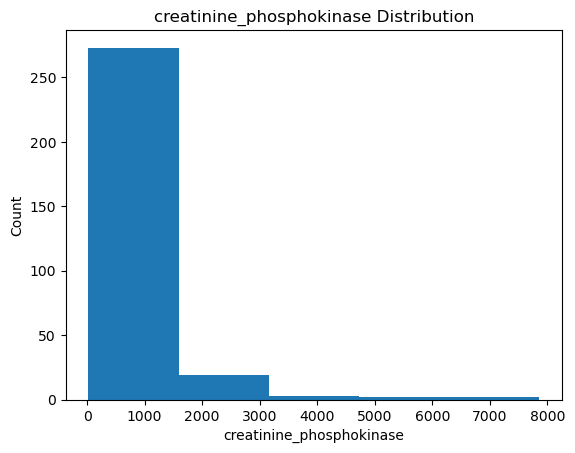

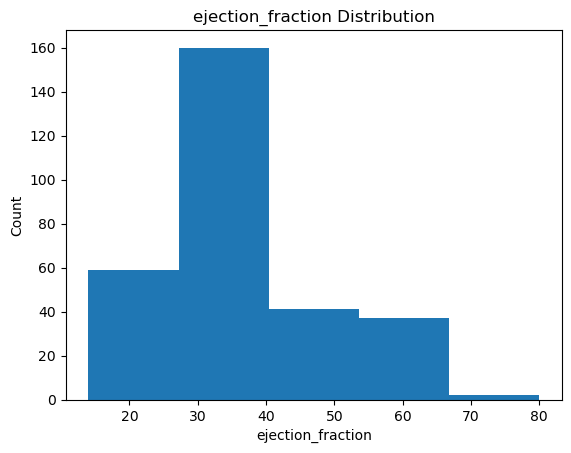

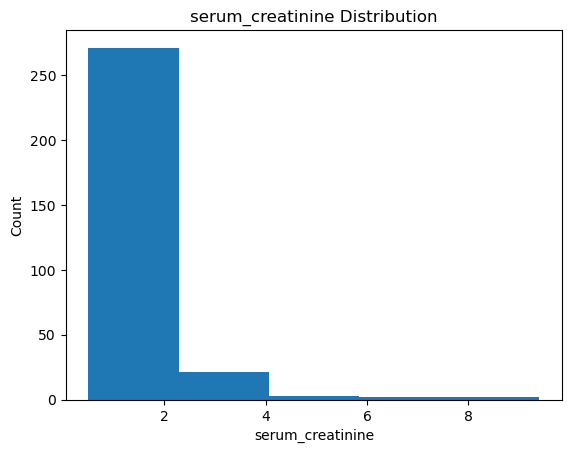

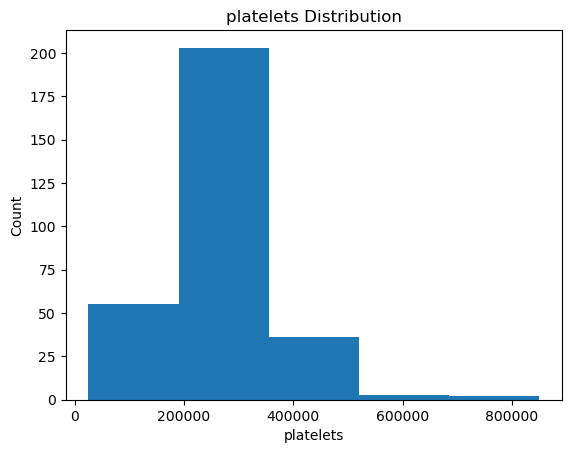

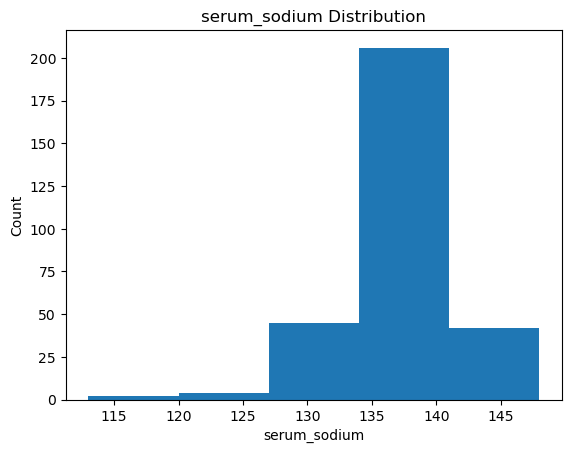

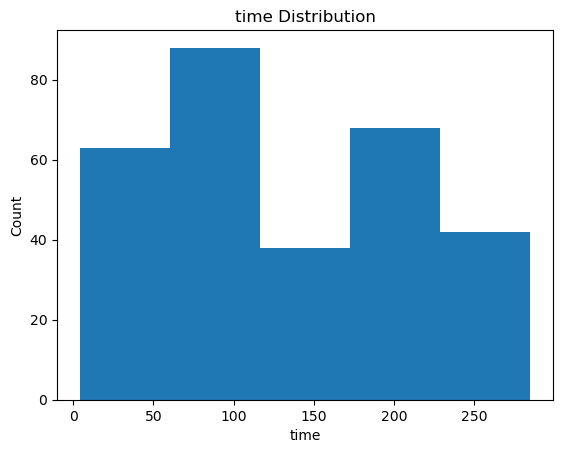

In [17]:
##Showing Histogram

non_classification_columns=['age', 'creatinine_phosphokinase', 'ejection_fraction','serum_creatinine','platelets','serum_sodium','time']
for col in non_classification_columns:
    plt.hist(df[col],bins=5)
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.title(f'{col} Distribution')
    plt.show()

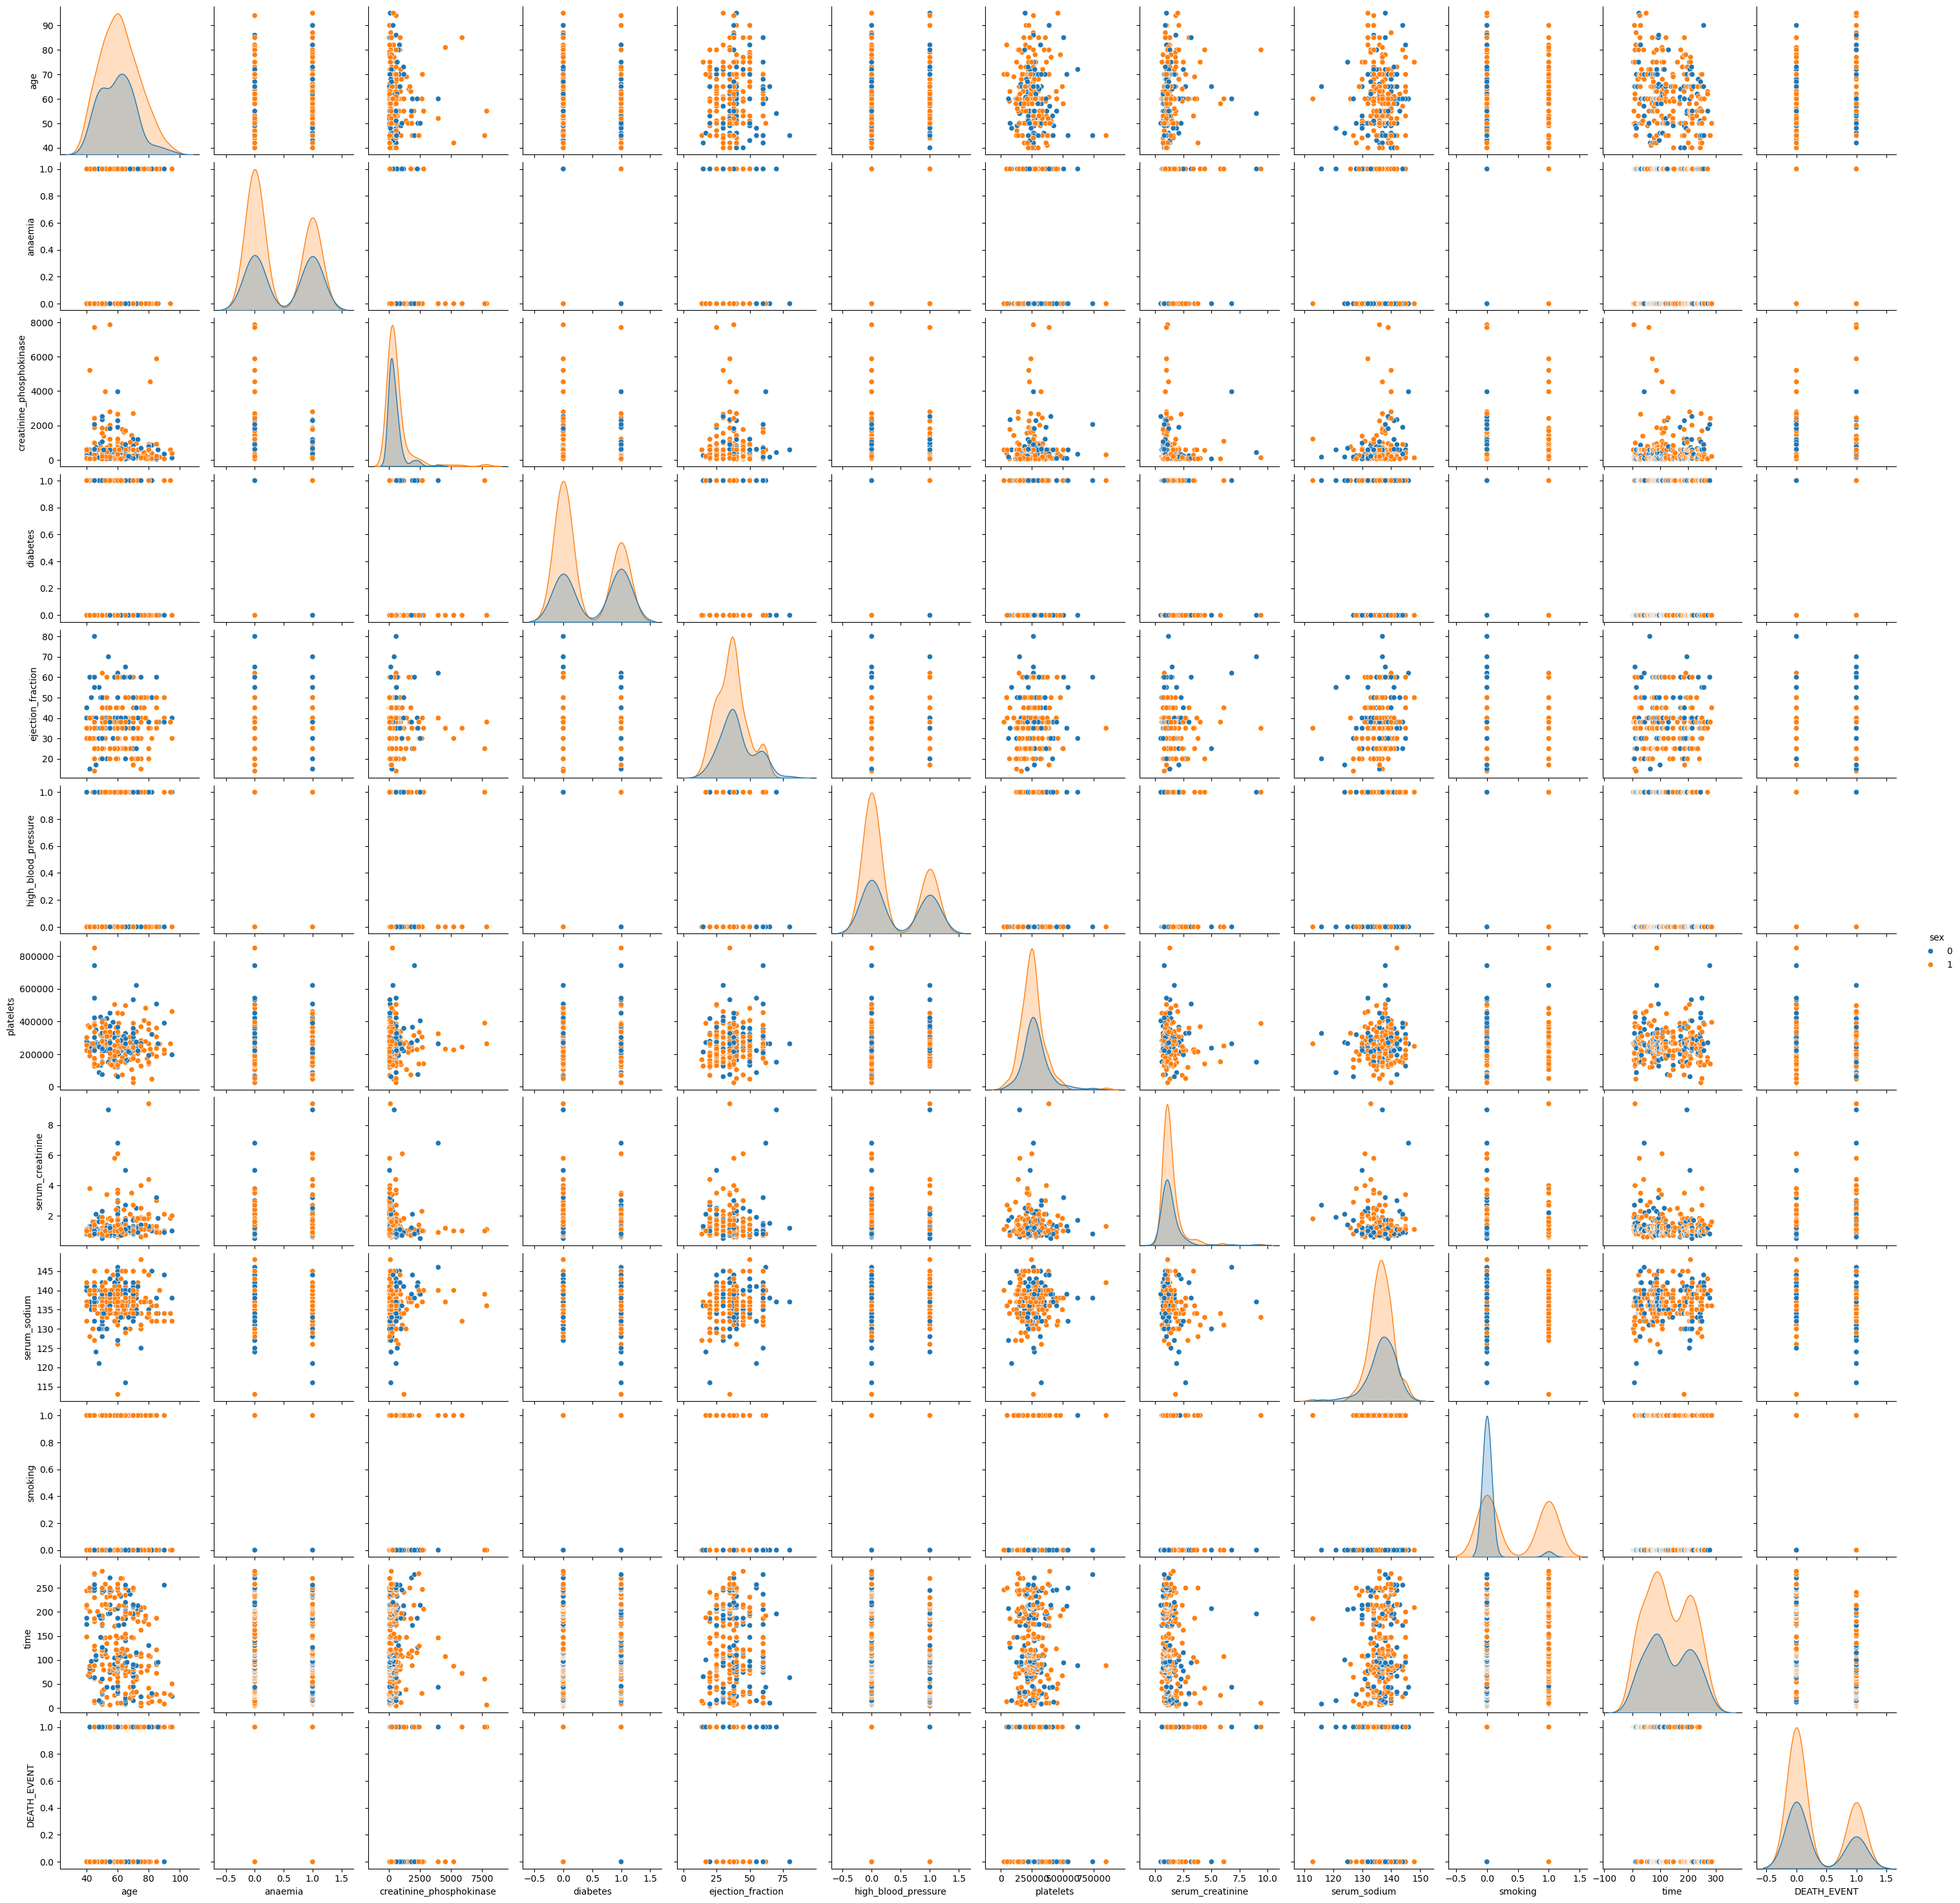

In [18]:
sns.pairplot(df,hue='sex')

In [19]:
df1=df.copy()
df2=df.copy()

# <font color='green'>**Task 6**: Create a correlation matrix heatmap to understand the relationships between the features.</font>

<Axes: >

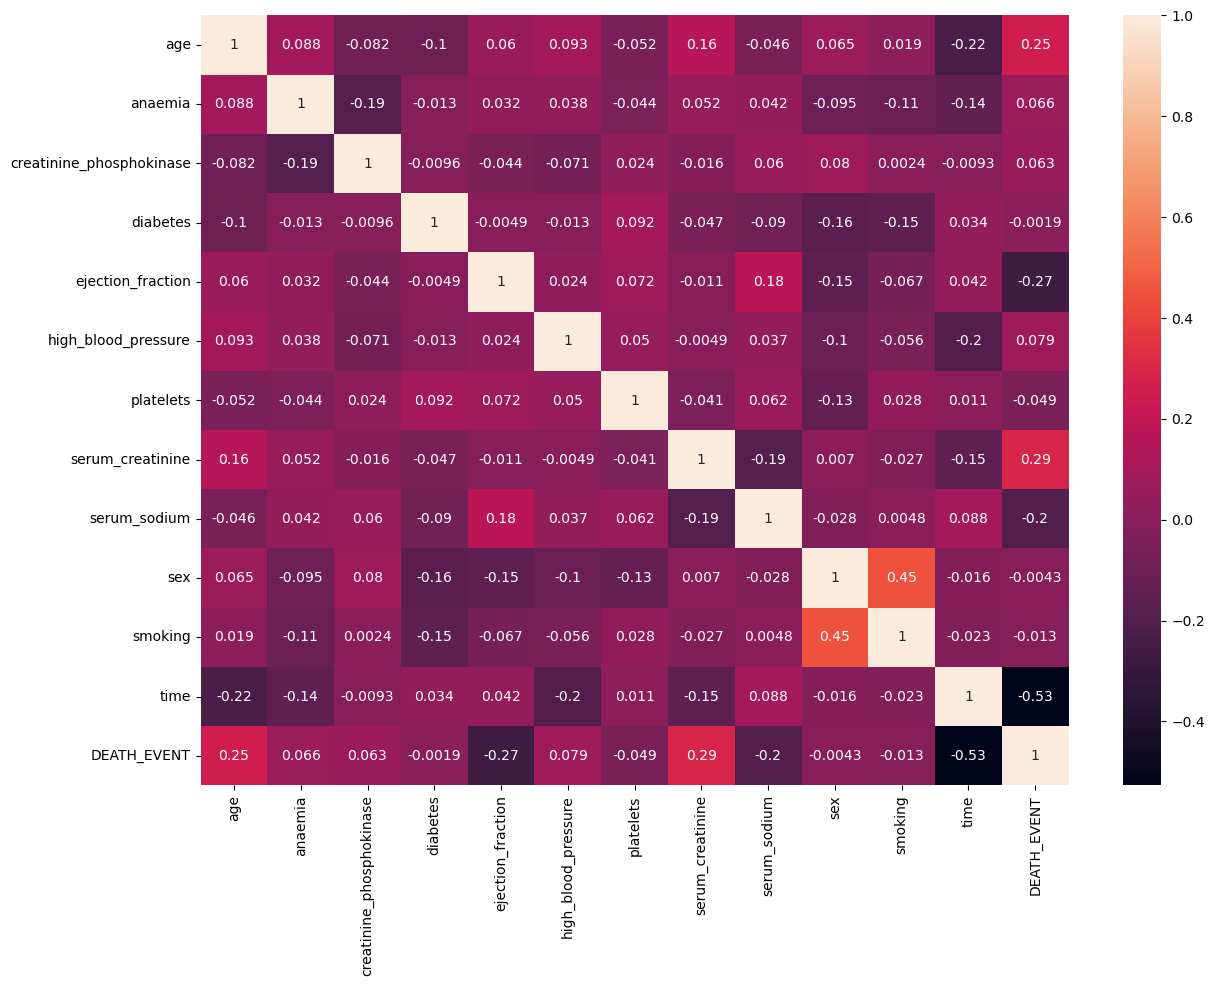

In [21]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True)

# <font color='green'>Observation: From all the features time is strongly negatively correleated with target variable DEATH_EVENT. Age and Serum_Creatinine have midium positive correlation with Death_event but no that much.</font>

# <font color='red'>**Task 7**: Create count plots or bar charts for categorical variables like `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`</font>.

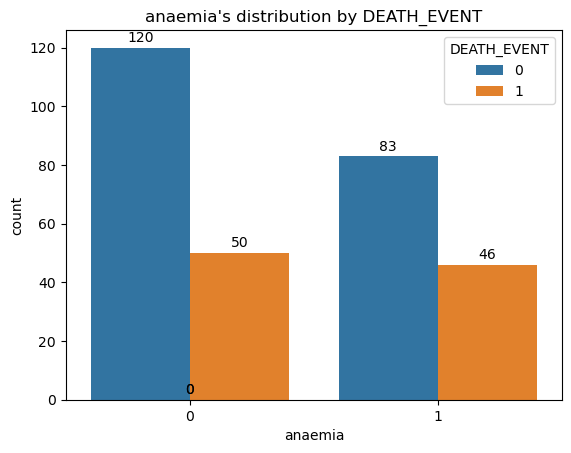

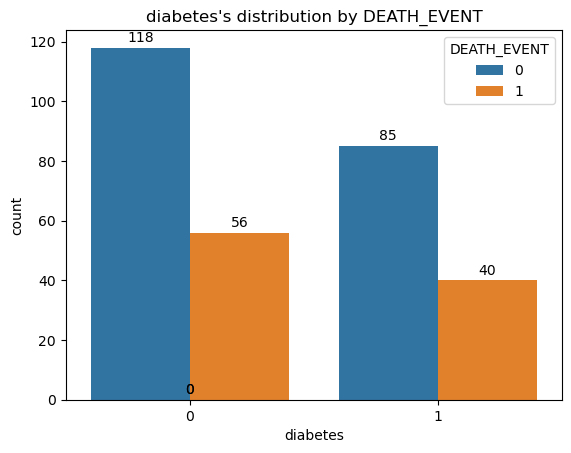

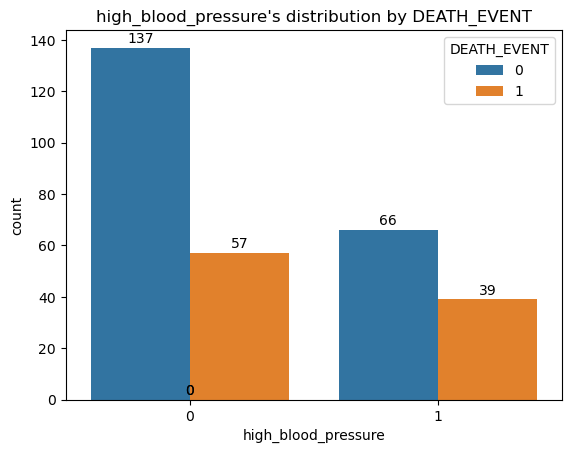

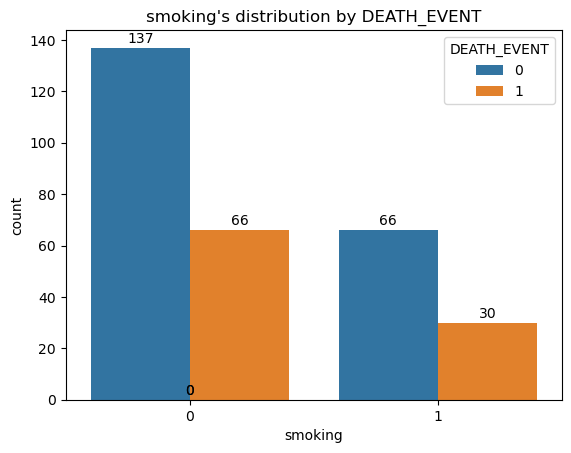

In [24]:
classification_columns10=['anaemia', 'diabetes', 'high_blood_pressure','smoking']

for cols in classification_columns10:
    sns.countplot(data=df, x=cols, hue='DEATH_EVENT')
    plt.title(f"{cols}'s distribution by DEATH_EVENT")
    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2,
        p.get_height()+2,
        int(p.get_height()),
             ha='center')
    plt.show()


In [25]:
non_classification_columns=['age', 'creatinine_phosphokinase', 'ejection_fraction','serum_creatinine','platelets','serum_sodium','time']

# <font color='red'>'**Task 8**: Create scatter plots or pair plots for continuous variables like `age` vs `ejection_fraction`, `serum_creatinine`, etc., colored by `DEATH_EVENT`</font>.

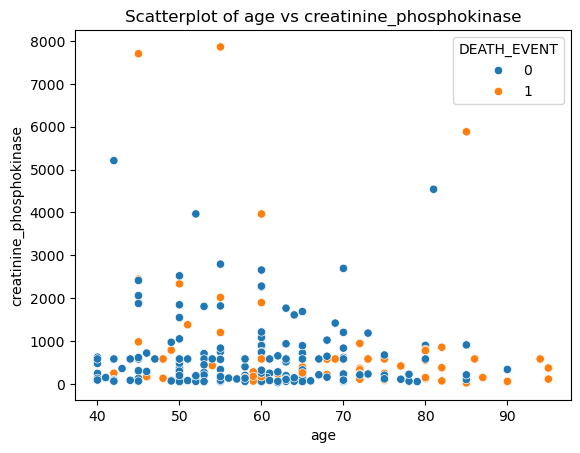

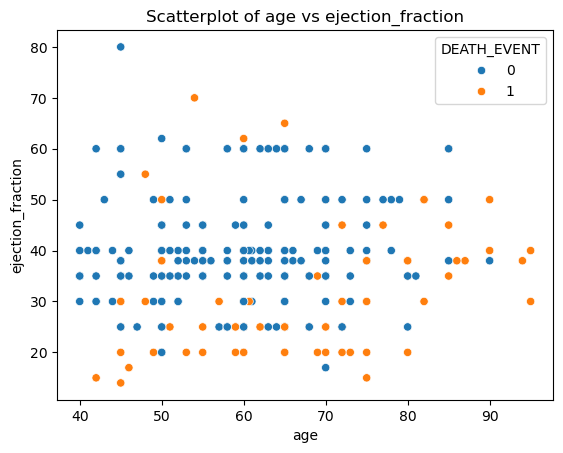

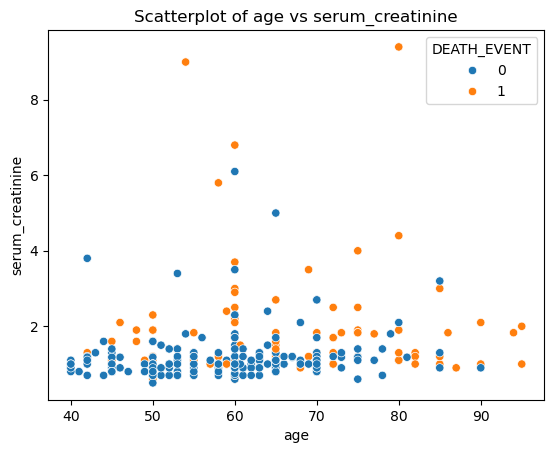

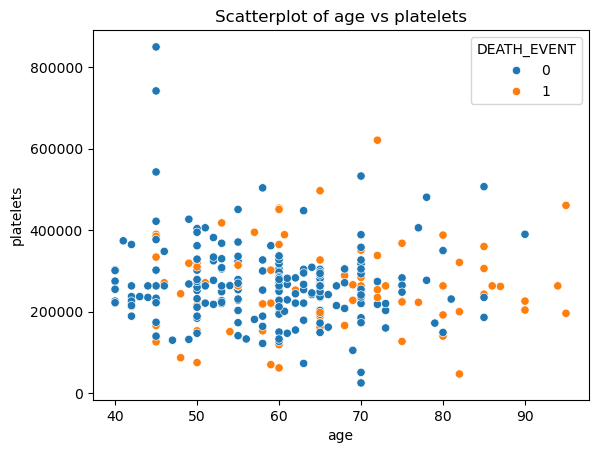

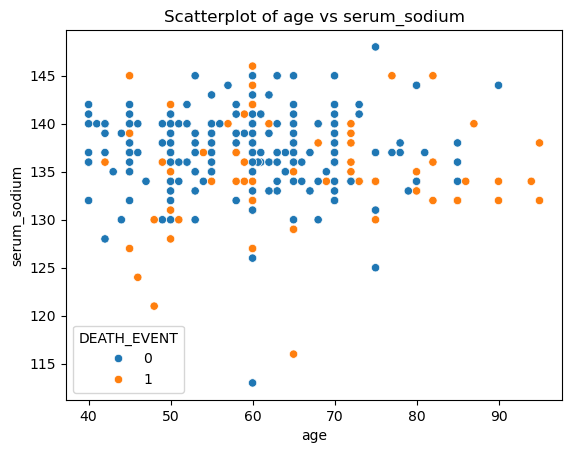

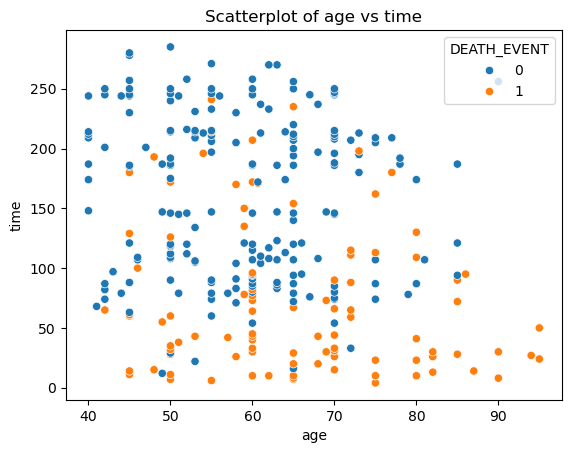

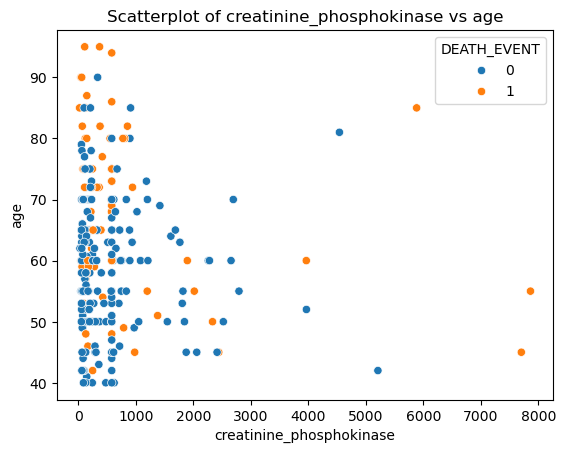

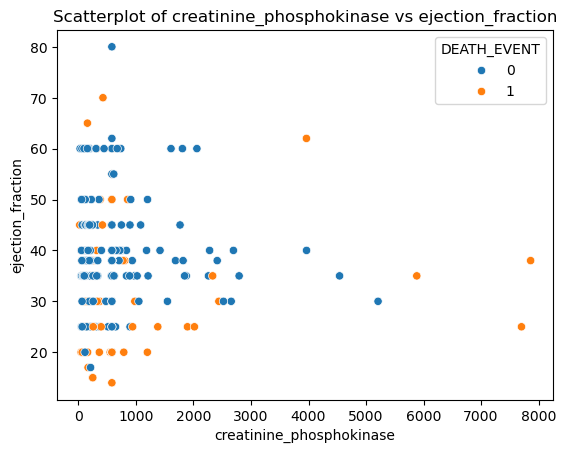

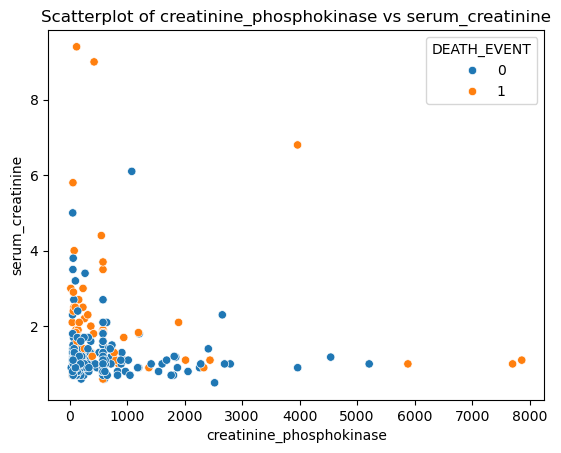

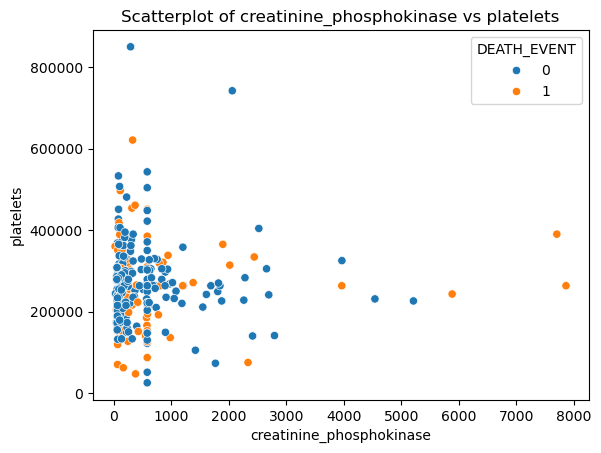

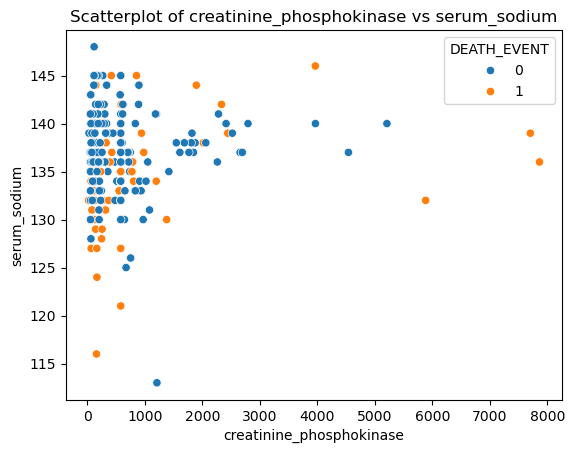

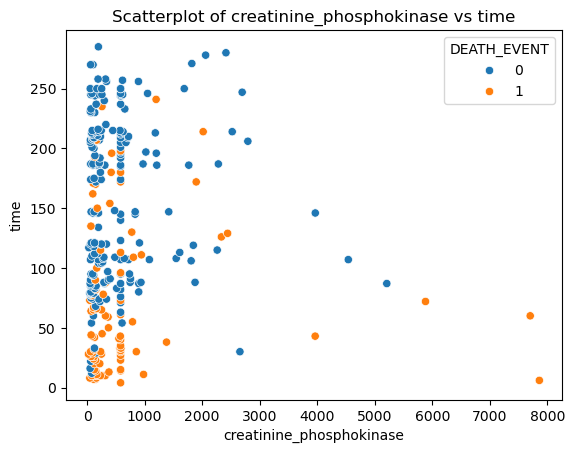

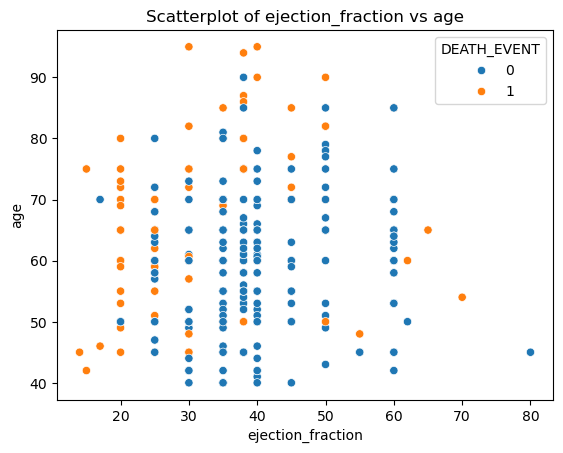

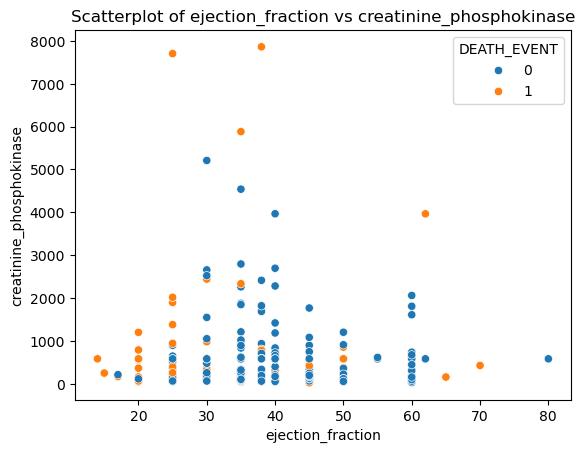

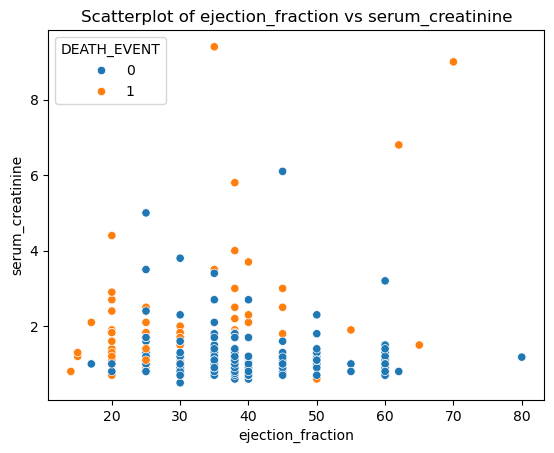

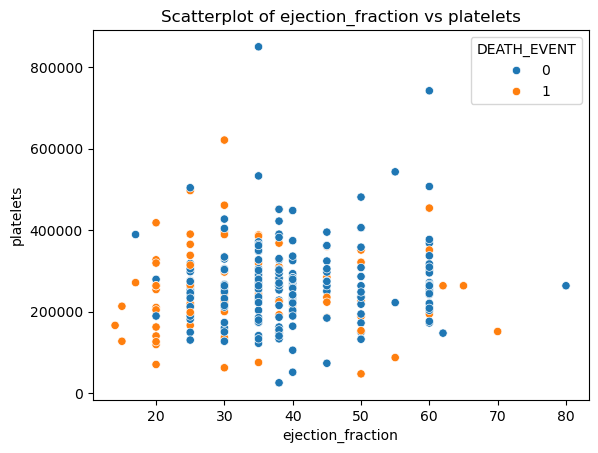

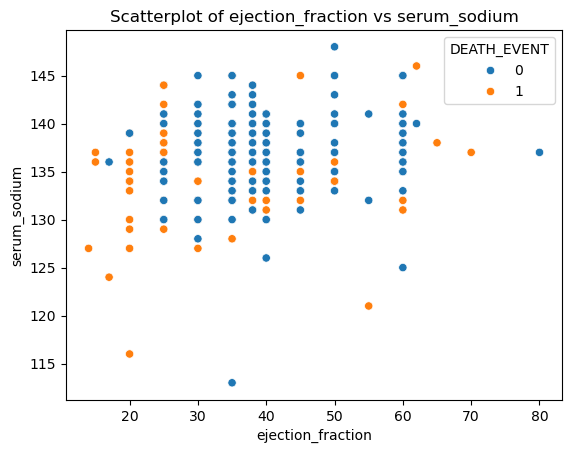

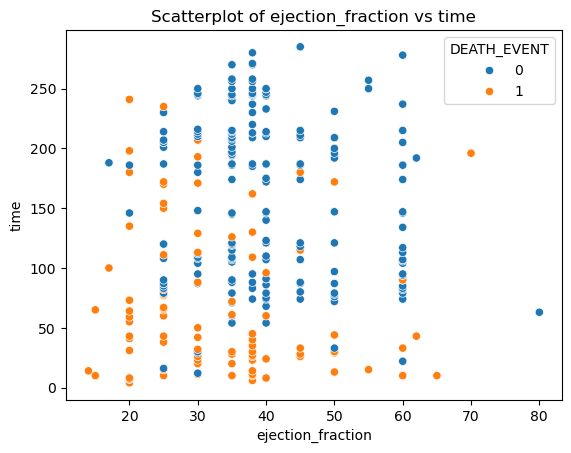

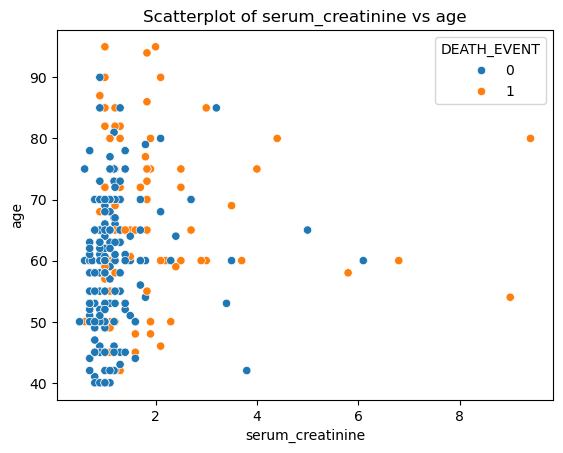

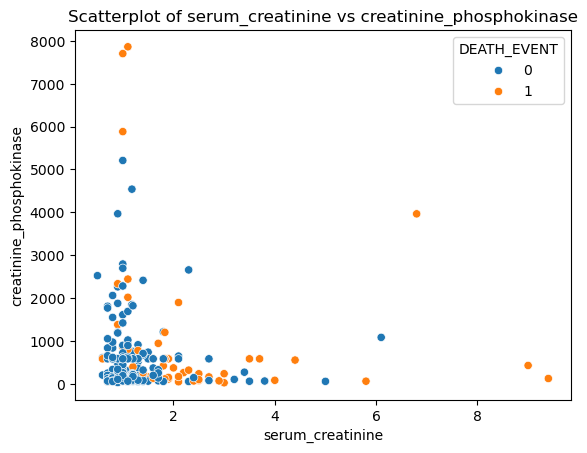

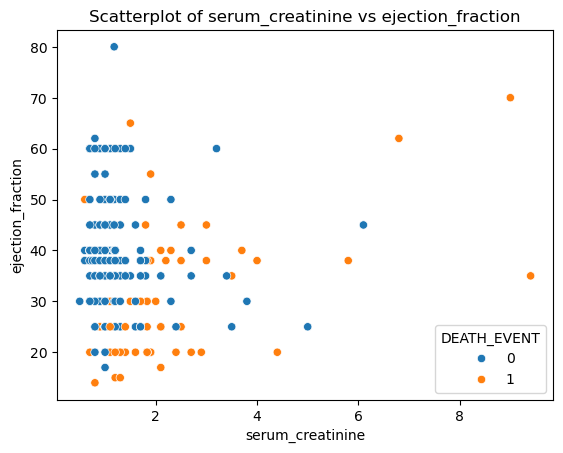

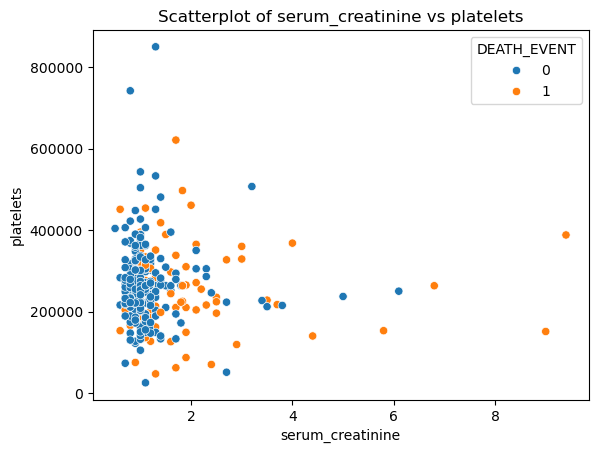

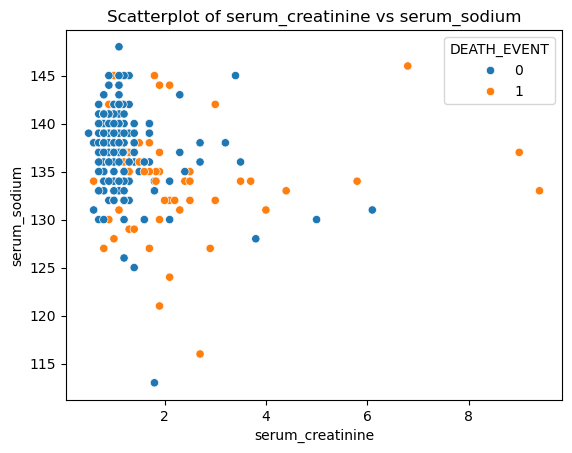

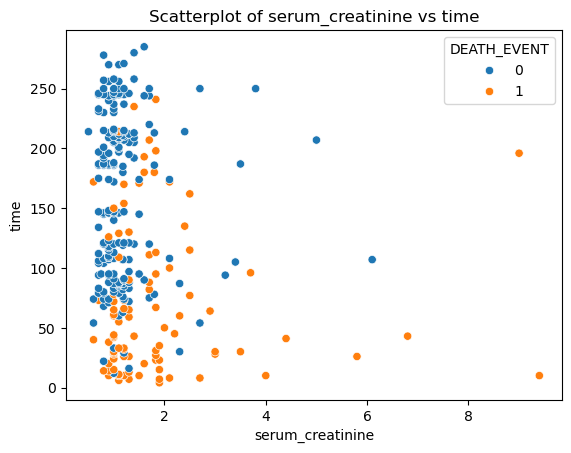

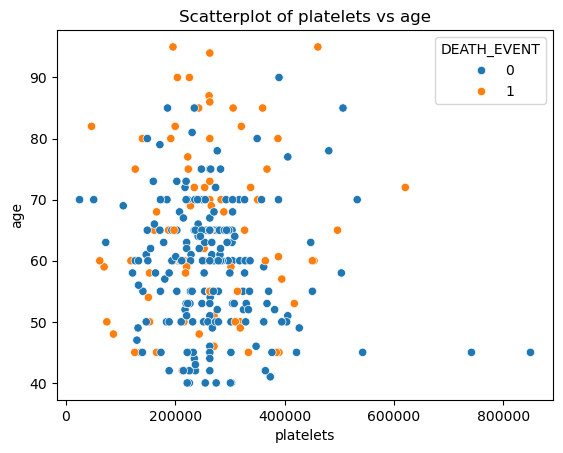

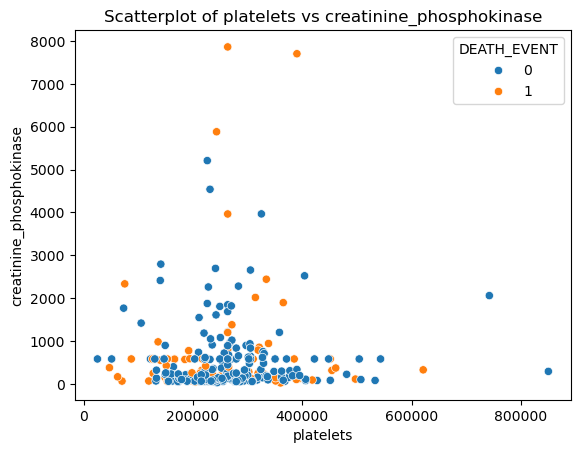

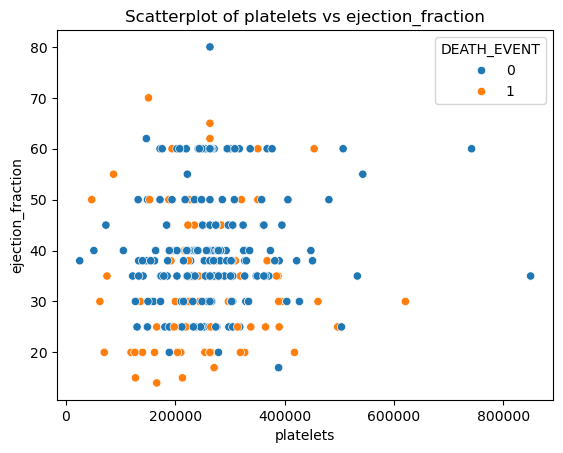

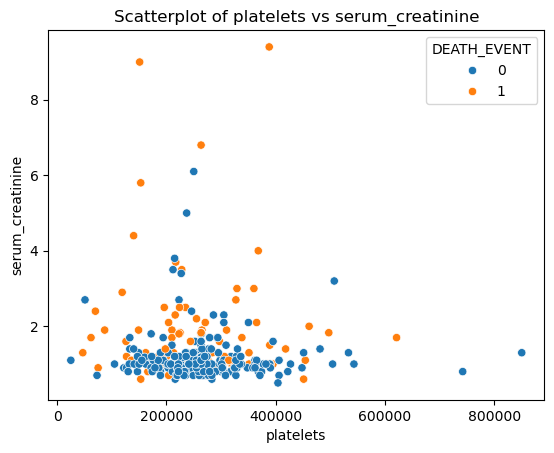

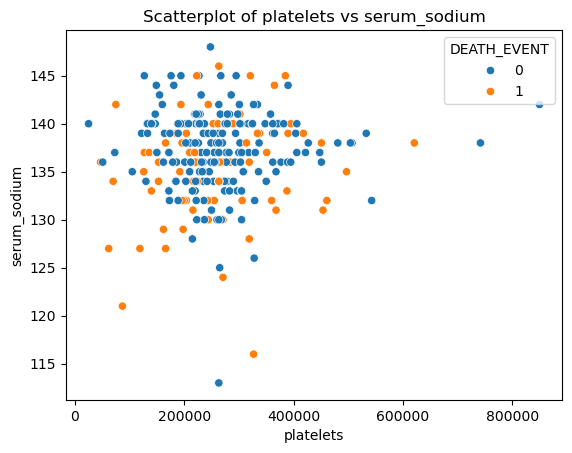

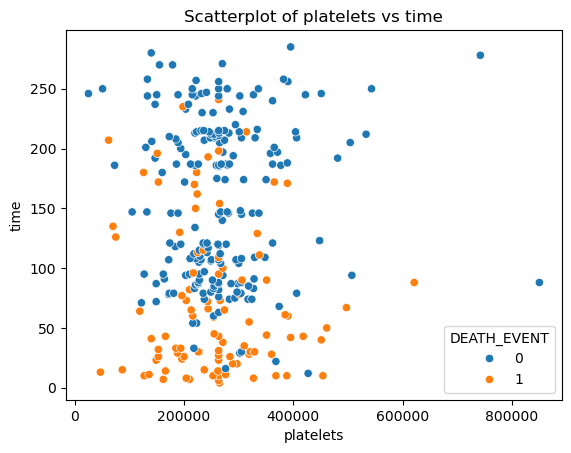

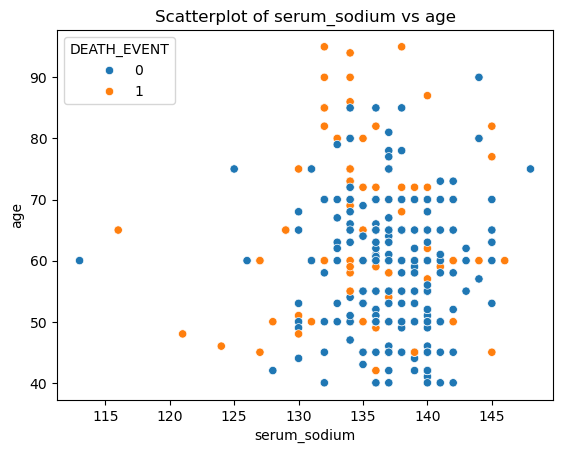

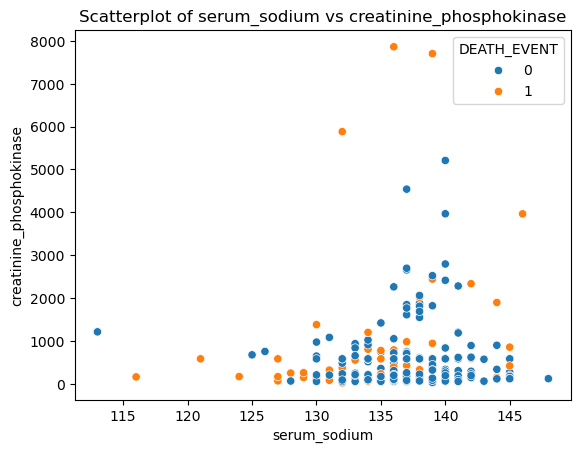

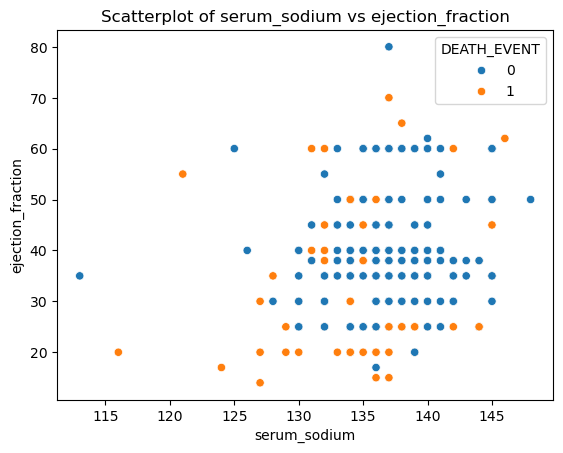

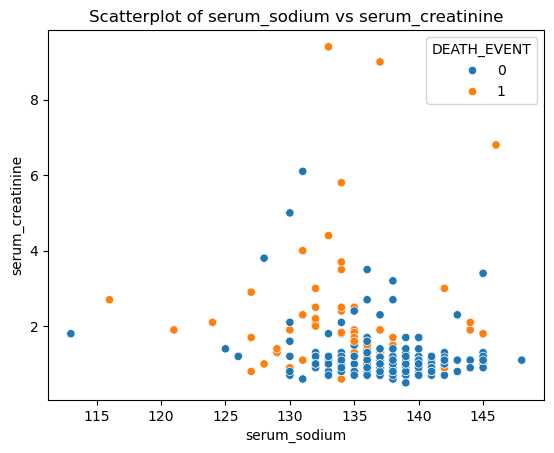

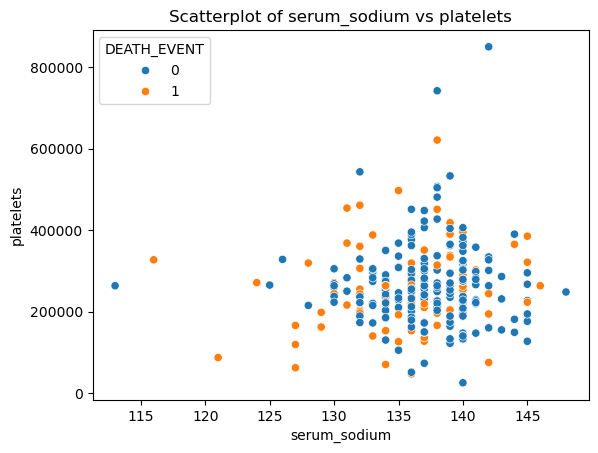

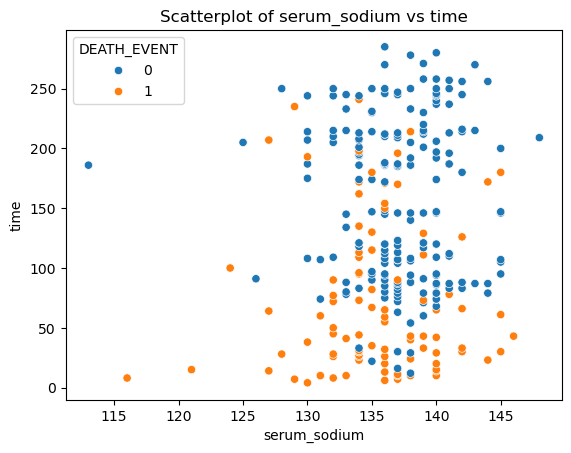

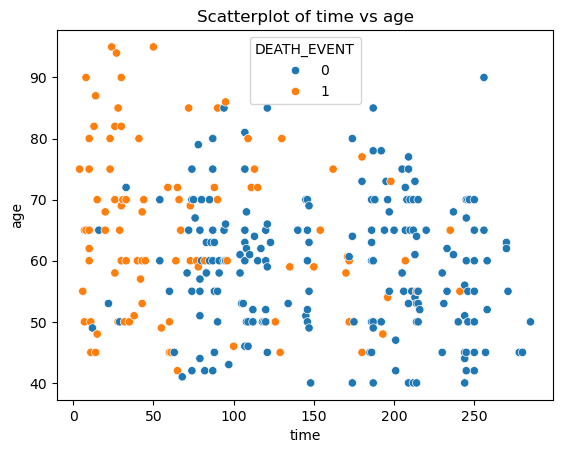

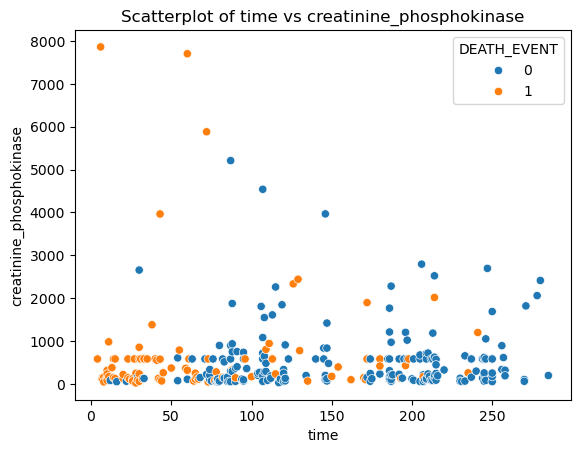

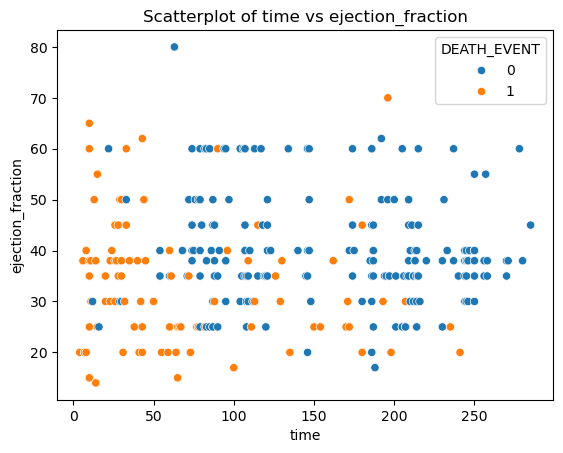

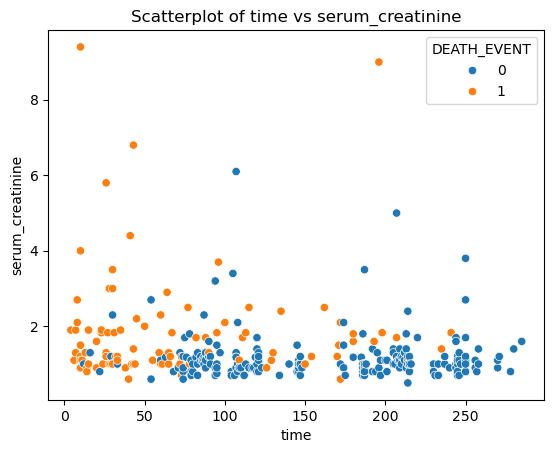

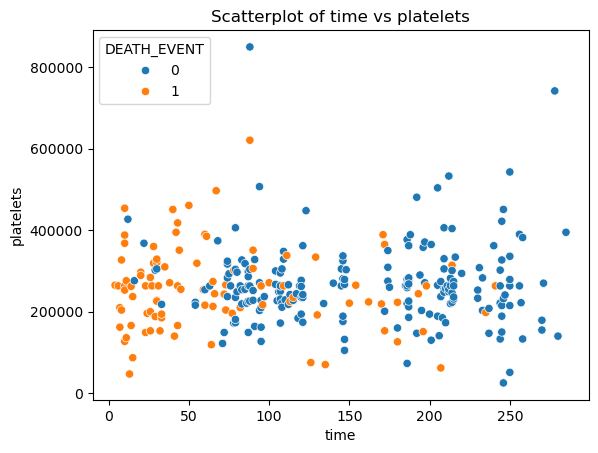

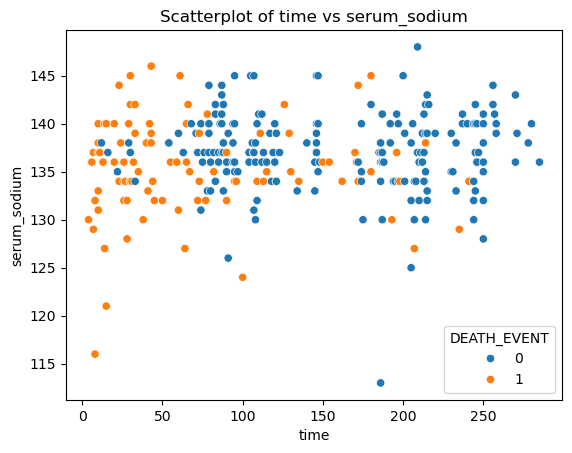

In [27]:
for cols in non_classification_columns:
    for colss in non_classification_columns:
        if cols == colss:
            continue
        sns.scatterplot(x=cols, y=colss, hue= 'DEATH_EVENT', data=df)
        plt.title(f'Scatterplot of {cols} vs {colss}')
        plt.xlabel(f'{cols}')
        plt.ylabel(f'{colss}')
        plt.show()


In [28]:
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x=df.iloc[:,0:12]
y=df.iloc[:,-1]

X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=2)

In [30]:
x

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  
0          0     4  
1          0     6  
2          1     7  
3          0     7  
4          0     8  
..       ...   ...  
294        1   270  
295        0   271  
296        0   278  
297        1   280  
298        1   285  

[299 rows x 12 columns]

In [31]:
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test= scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

log_reg = LogisticRegression(max_iter=1000,C=0.1,penalty='l2', solver='liblinear')
kf = KFold(n_splits=5, shuffle=True, random_state=2)

scores = cross_val_score(log_reg, scaled_X_train, y_train, cv=kf, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean Accuracy:", np.mean(scores))


Cross-validation scores: [0.83333333 0.83333333 0.85714286 0.73809524 0.68292683]
Mean Accuracy: 0.7889663182346109


In [33]:
log_reg.fit(scaled_X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

In [34]:
y_pred = log_reg.predict(scaled_X_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8888888888888888
Confusion Matrix:
 [[61  5]
 [ 5 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        66
           1       0.79      0.79      0.79        24

    accuracy                           0.89        90
   macro avg       0.86      0.86      0.86        90
weighted avg       0.89      0.89      0.89        90



In [36]:
# Initialize 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=2)

# Perform cross-validation
scores = cross_val_score(log_reg, X_train, y_train, cv=kf, scoring='accuracy')

print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))


K-Fold Cross-Validation Scores: [0.85714286 0.78571429 0.83333333 0.71428571 0.68292683]
Mean Accuracy: 0.7746806039488967
Standard Deviation: 0.06697492943622364


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_class=KNeighborsClassifier(n_neighbors=9, metric='euclidean', weights='uniform')

In [38]:
knn_class.fit(scaled_X_train, y_train)
y_knn_class_predict=knn_class.predict(scaled_X_test)
accuracy_knn_class = accuracy_score(y_test, y_knn_class_predict)
accuracy_knn_class

0.8222222222222222

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [40]:
# 1. Train Decision Tree Classifier
dt_class = DecisionTreeClassifier(random_state=22,criterion='entropy',max_depth=3, min_samples_split=2)
dt_class.fit(scaled_X_train, y_train)  # Note: Usually unscaled data for Decision Trees

# 2. Predict on Test Data
y_dt_class_predict = dt_class.predict(scaled_X_test)

# 3. Compute Accuracy
accuracy_dt_class = accuracy_score(y_test, y_dt_class_predict)
print("Decision Tree Classifier Accuracy:", accuracy_dt_class)

Decision Tree Classifier Accuracy: 0.8444444444444444


In [41]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

log_reg = LogisticRegression(max_iter=1000)

# Change KFold to StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Everything else is the same
scores = cross_val_score(log_reg, scaled_X_train, y_train, cv=skf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean Accuracy:", np.mean(scores))


Cross-validation scores: [0.76190476 0.80952381 0.83333333 0.76190476 0.80487805]
Mean Accuracy: 0.7943089430894309


In [42]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn = KNeighborsClassifier()

# Define parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# StratifiedKFold for class balance
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=skf, scoring='roc_auc', n_jobs=-1)
grid_search_knn.fit(scaled_X_train, y_train)

print("Best KNN Parameters:", grid_search_knn.best_params_)
print("Best KNN AUC Score:", grid_search_knn.best_score_)


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best KNN AUC Score: 0.7666735953640715


In [43]:
from sklearn.tree import DecisionTreeClassifier

# Define the model
dtree = DecisionTreeClassifier(random_state=42)

# Define parameter grid
param_grid_dtree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid Search
grid_search_dtree = GridSearchCV(dtree, param_grid_dtree, cv=skf, scoring='roc_auc', n_jobs=-1)
grid_search_dtree.fit(scaled_X_train, y_train)

print("Best Decision Tree Parameters:", grid_search_dtree.best_params_)
print("Best Decision Tree AUC Score:", grid_search_dtree.best_score_)


Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Best Decision Tree AUC Score: 0.8069173595364072


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

log_reg = LogisticRegression(max_iter=1000)

# Define parameter grid
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # or 'l1' if solver supports
    'solver': ['lbfgs', 'liblinear']  # 'lbfgs' for l2, 'liblinear' can do l1 or l2
}

# StratifiedKFold to maintain class balance
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Grid Search
grid_search_logreg = GridSearchCV(log_reg, param_grid_logreg, cv=skf, scoring='roc_auc', n_jobs=-1)
grid_search_logreg.fit(scaled_X_train, y_train)

print("Best Logistic Regression Parameters:", grid_search_logreg.best_params_)
print("Best Logistic Regression AUC Score:", grid_search_logreg.best_score_)


Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression AUC Score: 0.8428017132779038


## Objective
The goal of this assignment is to analyze the **heart failure clinical records** dataset and build a machine learning model to predict the occurrence of a **death event** in patients with heart failure. You will perform exploratory data analysis (EDA), visualize trends, and apply classification models to predict the target variable.

## Dataset Overview

The dataset consists of 13 variables, each representing clinical features and demographic information of heart failure patients:

1. **age**: Age of the patient (years)
2. **anaemia**: Whether the patient has anaemia (0: no, 1: yes)
3. **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
4. **diabetes**: Whether the patient has diabetes (0: no, 1: yes)
5. **ejection_fraction**: Percentage of blood leaving the heart with each contraction (%)
6. **high_blood_pressure**: Whether the patient has high blood pressure (0: no, 1: yes)
7. **platelets**: Platelets in the blood (kiloplatelets/mL)
8. **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
9. **serum_sodium**: Level of serum sodium in the blood (mEq/L)
10. **sex**: Gender of the patient (1: male, 0: female)
11. **smoking**: Whether the patient smokes (0: no, 1: yes)
12. **time**: Follow-up period (days)
13. **DEATH_EVENT**: Whether the patient died during the follow-up period (0: no, 1: yes) [Target Variable]

## Instructions

### 1. Data Exploration (EDA)
- **Task 1**: Load the dataset using pandas and display the first few rows.
- **Task 2**: Check for missing values and clean the data if necessary.
- **Task 3**: Generate summary statistics for the numerical columns.
- **Task 4**: Visualize the distribution of the target variable (`DEATH_EVENT`).
- **Task 5**: Plot histograms or box plots for continuous variables like `age`, `creatinine_phosphokinase`, `ejection_fraction`, `serum_creatinine`, etc.

### 2. Data Visualization
- **Task 6**: Create a correlation matrix heatmap to understand the relationships between the features.
- **Task 7**: Create count plots or bar charts for categorical variables like `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`.
- **Task 8**: Create scatter plots or pair plots for continuous variables like `age` vs `ejection_fraction`, `serum_creatinine`, etc., colored by `DEATH_EVENT`.

### 3. Model Building
- **Task 9**: Split the dataset into features (`X`) and the target variable (`y = DEATH_EVENT`).
- **Task 10**: Perform train-test splitting (70% training, 30% testing) using `train_test_split` from sklearn.
- **Task 11**: Standardize the continuous features using `StandardScaler`.

### 4. Model Training and Evaluation
- **Task 12**: Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.
- **Task 13**: Train a K-Nearest Neighbors (KNN) model and evaluate its performance.
- **Task 14**: Train a Decision Tree Classifier and compare its performance with other models.

### 5. Cross Validation
- **Task 15**: Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance.
- **Task 16**: Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation.

### 6. Model Improvement
- **Task 17**: Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models.
- **Task 18**: Plot the ROC curves and calculate the AUC for all models to compare their performance visually.

### 7. Conclusion
- **Task 19**: Summarize your findings and explain which model performed best and why. Consider which features were most important for predicting the death event.
- **Task 20**: Suggest potential improvements or next steps for the analysis.

## Submission Instructions:
- Submit your notebook file to github with the completed analysis.
- Ensure that the notebook is well-documented with explanations for each step.
- Include visualizations and comments on the results of each model.
- Submit github link only